In [1]:
import tensorflow as tf
from tensorflow.keras import layers 
from tensorflow.keras.regularizers import l2
from sklearn import datasets
import sklearn
import pandas as pd
import numpy as np
print(tf.__version__)

2.1.0


In [2]:
# import gzip
# import shutil
# # C:\Users\allro\JupyterNotebook\QTW\Data
# with gzip.open('C:\\Users\\allro\\JupyterNotebook\\QTW\\Data\\HIGGS.csv.gz', 'rb') as f_in:
#    with open('C:\\Users\\allro\\JupyterNotebook\\QTW\\Data\\HIGGS.csv', 'wb') as f_out:
#        shutil.copyfileobj(f_in, f_out)

In [2]:
#https://archive.ics.uci.edu/ml/datasets/HIGGS#
#df = pd.read_csv("./Data/HIGGS.csv", header=None)
df = pd.read_csv("../../HIGGS.csv", header=None)

In [3]:
df.columns =['target', 'lepton_ph', 'lepton_eta', 'lepton_phi','missing_energy_magnitude','missing_energy_phi',
             'jet_1_pt','jet_1_eta','jet_1_phi','jet_1_btag','jet_2_pt','jet_2_eta','jet_2_phi','jet_2_btag',
             'jet_3_pt','jet_3_eta','jet_3_phi','jet_3_btag','jet_4_pt','jet_4_eta','jet_4_phi','jet_4_btag',
             'm_jj','m_jjj','m_lv','m_jlv','m_bb','m_wbb','m_wwbb'] 

In [4]:
# Print out the data types
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000000 entries, 0 to 10999999
Data columns (total 29 columns):
target                      float64
lepton_ph                   float64
lepton_eta                  float64
lepton_phi                  float64
missing_energy_magnitude    float64
missing_energy_phi          float64
jet_1_pt                    float64
jet_1_eta                   float64
jet_1_phi                   float64
jet_1_btag                  float64
jet_2_pt                    float64
jet_2_eta                   float64
jet_2_phi                   float64
jet_2_btag                  float64
jet_3_pt                    float64
jet_3_eta                   float64
jet_3_phi                   float64
jet_3_btag                  float64
jet_4_pt                    float64
jet_4_eta                   float64
jet_4_phi                   float64
jet_4_btag                  float64
m_jj                        float64
m_jjj                       float64
m_lv                 

In [5]:
df.head()

,target,lepton_ph,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet_1_pt,jet_1_eta,jet_1_phi,jet_1_btag,...,jet_4_eta,jet_4_phi,jet_4_btag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,1.0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
2,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
3,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
4,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487


In [6]:
#subsample the data
train = df.sample(n=2600000, random_state=123)

In [7]:
#figure out which columns have values strictly greater than 0, for scaler purposes
pd.set_option("display.max_rows", 500, "display.max_columns", None)
df.describe()

,target,lepton_ph,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet_1_pt,jet_1_eta,jet_1_phi,jet_1_btag,jet_2_pt,jet_2_eta,jet_2_phi,jet_2_btag,jet_3_pt,jet_3_eta,jet_3_phi,jet_3_btag,jet_4_pt,jet_4_eta,jet_4_phi,jet_4_btag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
count,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07
mean,5.299203e-01,9.914658e-01,-8.297618e-06,-1.327225e-05,9.985364e-01,2.613459e-05,9.909152e-01,-2.027520e-05,7.716199e-06,9.999687e-01,9.927294e-01,-1.026444e-05,-2.076887e-05,1.000008e+00,9.922591e-01,1.459561e-05,3.678632e-06,1.000011e+00,9.861087e-01,-5.756954e-06,1.744903e-05,1.000000e+00,1.034290e+00,1.024805e+00,1.050554e+00,1.009742e+00,9.729596e-01,1.033036e+00,9.598120e-01
std,4.991040e-01,5.653777e-01,1.008827e+00,1.006346e+00,6.000185e-01,1.006326e+00,4.749747e-01,1.009303e+00,1.005901e+00,1.027808e+00,4.999939e-01,1.009331e+00,1.006154e+00,1.049398e+00,4.876623e-01,1.008747e+00,1.006305e+00,1.193676e+00,5.057777e-01,1.007694e+00,1.006366e+00,1.400209e+00,6.746354e-01,3.808074e-01,1.645763e-01,3.974453e-01,5.254063e-01,3.652556e-01,3.133378e-01
min,0.000000e+00,2.746966e-01,-2.434976e+00,-1.742508e+00,2.370088e-04,-1.743944e+00,1.375024e-01,-2.969725e+00,-1.741237e+00,0.000000e+00,1.889811e-01,-2.913090e+00,-1.742372e+00,0.000000e+00,2.636076e-01,-2.729663e+00,-1.742069e+00,0.000000e+00,3.653542e-01,-2.497265e+00,-1.742691e+00,0.000000e+00,7.507046e-02,1.986757e-01,8.304866e-02,1.320062e-01,4.786215e-02,2.951122e-01,3.307214e-01
25%,0.000000e+00,5.907533e-01,-7.383225e-01,-8.719308e-01,5.768156e-01,-8.712081e-01,6.789927e-01,-6.872450e-01,-8.680962e-01,0.000000e+00,6.564608e-01,-6.944718e-01,-8.701791e-01,0.000000e+00,6.508527e-01,-6.998083e-01,-8.711343e-01,0.000000e+00,6.177673e-01,-7.141902e-01,-8.714789e-01,0.000000e+00,7.906095e-01,8.462266e-01,9.857525e-01,7.675732e-01,6.738168e-01,8.193964e-01,7.703901e-01
50%,1.000000e+00,8.533714e-01,-5.415563e-05,-2.410638e-04,8.916277e-01,2.125454e-04,8.948193e-01,-2.543566e-05,5.813991e-05,1.086538e+00,8.901377e-01,6.027267e-05,3.514990e-04,0.000000e+00,8.972494e-01,1.728937e-04,-7.519117e-04,0.000000e+00,8.682333e-01,3.721330e-04,-2.642369e-04,0.000000e+00,8.949304e-01,9.506853e-01,9.897798e-01,9.165110e-01,8.733798e-01,9.473447e-01,8.719701e-01
75%,1.000000e+00,1.236226e+00,7.382142e-01,8.709940e-01,1.293056e+00,8.714708e-01,1.170740e+00,6.871941e-01,8.683126e-01,2.173076e+00,1.201875e+00,6.945924e-01,8.698727e-01,2.214872e+00,1.221798e+00,7.001541e-01,8.713947e-01,2.548224e+00,1.220930e+00,7.141017e-01,8.716055e-01,3.101961e+00,1.024730e+00,1.083493e+00,1.020528e+00,1.142226e+00,1.138439e+00,1.140458e+00,1.059248e+00
max,1.000000e+00,1.209891e+01,2.434868e+00,1.743236e+00,1.539682e+01,1.743257e+00,9.940391e+00,2.969674e+00,1.741454e+00,2.173076e+00,1.164708e+01,2.913210e+00,1.743175e+00,2.214872e+00,1.470899e+01,2.730009e+00,1.742884e+00,2.548224e+00,1.288257e+01,2.498009e+00,1.743372e+00,3.101961e+00,4.019237e+01,2.037278e+01,7.992739e+00,1.426244e+01,1.776285e+01,1.149652e+01,8.374498e+00


In [8]:
train.shape

(2600000, 29)

In [9]:
y = train['target']
pre_X = train.loc[:, df.columns != 'target']

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scaled_train = scaler.fit_transform(pre_X)
# X = pd.DataFrame(data=scaled_train, columns=pre_X.columns)

In [10]:
#not complete, need columns where mean=1 and stdev=1
from sklearn.preprocessing import StandardScaler

#NOT strictly greater than 0 columns:
not_greater_than_0 = ['lepton_eta','lepton_phi','missing_energy_phi','jet_1_eta','jet_1_phi','jet_1_btag',
                      'jet_2_eta','jet_2_phi','jet_2_btag','jet_3_eta','jet_3_phi','jet_3_btag','jet_4_eta',
                      'jet_4_phi','jet_4_btag']

#strictly greater than 0 columns:
greater_than_0 = ['lepton_ph','missing_energy_magnitude','jet_1_pt','jet_2_pt','jet_4_pt','jet_3_pt','m_jj','m_jjj','m_lv',
                  'm_jlv','m_bb','m_wbb','m_wwbb']


#these columns scale where mean=0 and stdev=1
to_scale1 = pre_X[not_greater_than_0]
scaler = StandardScaler()
scaled_train1 = scaler.fit_transform(to_scale1)
scaled_train_df1 = pd.DataFrame(scaled_train1, columns=not_greater_than_0)

#these columns scale where mean=1 and stdev=1
to_scale2 = pre_X[greater_than_0]
scaler = StandardScaler()
scaled_train2 = scaler.fit_transform(to_scale2)
scaled_train_df2 = pd.DataFrame(scaled_train2 + 1, columns=greater_than_0)
scaled_train_df2.describe()

,lepton_ph,missing_energy_magnitude,jet_1_pt,jet_2_pt,jet_4_pt,jet_3_pt,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
count,2.600000e+06,2.600000e+06,2.600000e+06,2.600000e+06,2.600000e+06,2.600000e+06,2.600000e+06,2.600000e+06,2.600000e+06,2.600000e+06,2.600000e+06,2.600000e+06,2.600000e+06
mean,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.695209e-01,-6.625666e-01,-7.968404e-01,-6.073939e-01,-2.264619e-01,-4.952153e-01,-4.221755e-01,-1.084725e+00,-4.670169e+00,-9.966000e-01,-7.556114e-01,-9.412959e-01,-9.336352e-01
25%,2.906835e-01,2.969626e-01,3.428450e-01,3.272016e-01,2.719195e-01,2.992355e-01,6.380529e-01,5.307856e-01,6.057191e-01,3.903798e-01,4.299310e-01,4.150297e-01,3.953860e-01
50%,7.556306e-01,8.220505e-01,7.978708e-01,7.947510e-01,7.664560e-01,8.050897e-01,7.926677e-01,8.047199e-01,6.301876e-01,7.658091e-01,8.108293e-01,7.650499e-01,7.195430e-01
75%,1.432801e+00,1.489800e+00,1.378221e+00,1.418066e+00,1.464286e+00,1.471996e+00,9.855056e-01,1.154184e+00,8.183915e-01,1.333369e+00,1.315954e+00,1.293396e+00,1.316636e+00
max,1.991209e+01,2.073755e+01,1.696594e+01,1.894311e+01,2.448835e+01,2.914014e+01,4.321080e+01,3.756345e+01,3.609834e+01,2.720432e+01,2.530246e+01,2.221914e+01,1.902509e+01


In [11]:
(scaled_train2 + 1).shape

(2600000, 13)

In [12]:
pre_X[greater_than_0].to_numpy().shape

# np_greater_than_0 = pre_X[greater_than_0].to_numpy()

def manual_scaling(x, desired_mean=0, desired_std=1):
    new_x = np.empty(x.shape)
    for i in range(x.shape[1]):
        mean = np.mean(x[:, i])
        std = np.std(x[:, i])
        new_x[:, i] = desired_mean + (x[:, i] - mean) * (desired_std / std)
    return new_x

np_greater_than_0 = manual_scaling(pre_X[greater_than_0].to_numpy(), desired_mean=1, desired_std=1)


In [13]:
np.round((np_greater_than_0), 3)

array([[ 1.175,  0.16 , -0.132, ...,  1.105,  1.272,  0.858],
       [ 0.51 ,  4.281,  1.223, ...,  0.709,  1.38 ,  1.777],
       [-0.131,  0.97 ,  0.063, ...,  0.414,  0.217,  0.345],
       ...,
       [ 0.141,  0.259,  1.578, ...,  0.017,  1.233,  0.923],
       [ 1.813,  0.645,  1.675, ...,  1.379,  1.363,  1.836],
       [ 0.164,  0.846,  1.208, ...,  1.776,  0.987,  0.697]])

In [14]:
np.round((scaled_train2 + 1), 3)

array([[ 1.175,  0.16 , -0.132, ...,  1.105,  1.272,  0.858],
       [ 0.51 ,  4.281,  1.223, ...,  0.709,  1.38 ,  1.777],
       [-0.131,  0.97 ,  0.063, ...,  0.414,  0.217,  0.345],
       ...,
       [ 0.141,  0.259,  1.578, ...,  0.017,  1.233,  0.923],
       [ 1.813,  0.645,  1.675, ...,  1.379,  1.363,  1.836],
       [ 0.164,  0.846,  1.208, ...,  1.776,  0.987,  0.697]])

In [15]:
are_they_the_same = np.round((np_greater_than_0), 3) == np.round((scaled_train2 + 1), 3)

In [16]:
sum(are_they_the_same == True)

array([2600000, 2600000, 2600000, 2600000, 2600000, 2600000, 2600000,
       2600000, 2600000, 2600000, 2600000, 2600000, 2600000])

In [17]:
X = pd.concat([scaled_train_df1, scaled_train_df2], axis=1, sort=False)
X.head()

,lepton_eta,lepton_phi,missing_energy_phi,jet_1_eta,jet_1_phi,jet_1_btag,jet_2_eta,jet_2_phi,jet_2_btag,jet_3_eta,jet_3_phi,jet_3_btag,jet_4_eta,jet_4_phi,jet_4_btag,lepton_ph,missing_energy_magnitude,jet_1_pt,jet_2_pt,jet_4_pt,jet_3_pt,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,-0.322691,0.863880,-0.572453,-2.141693,-0.523203,-0.972454,1.723081,-1.709792,-0.952660,0.025451,1.289919,1.296983,-0.002654,-0.786827,-0.714619,1.174569,0.160122,-0.132040,0.571042,0.458873,0.872105,0.537537,1.043547,0.613459,0.855754,1.105013,1.271511,0.857620
1,0.416089,0.695152,0.802544,-0.470049,-0.668134,-0.972454,-0.789944,-1.505140,1.158021,0.802190,-0.192560,-0.837770,0.480915,1.476132,-0.714619,0.509711,4.281044,1.223397,2.620156,1.344617,2.941280,0.587525,0.553713,0.652878,2.778725,0.708706,1.379553,1.777043
2,-0.014625,0.186212,-1.239583,1.129981,-1.392778,-0.972454,0.016302,1.064422,-0.952660,-0.055741,-0.050936,1.296983,2.108518,-0.857386,-0.714619,-0.131495,0.969540,0.063081,1.850889,1.313378,2.026490,0.902127,1.344002,0.611636,0.129997,0.414243,0.217026,0.345026
3,-1.836948,-1.475806,0.854693,2.403334,-1.289730,-0.972454,0.352078,0.411301,1.158021,-0.669193,0.629738,-0.837770,0.763617,-0.477577,1.500372,0.974982,-0.110502,0.356920,0.772858,2.591291,1.104855,0.865492,1.335313,0.656397,1.385766,0.819796,1.213709,0.937928
4,2.177572,0.531387,-1.002016,0.825868,0.737725,-0.972454,1.490251,-0.738936,-0.952660,-0.136933,1.334005,1.296983,1.046319,-0.080681,0.392877,-0.051790,2.577822,0.874030,0.138219,1.611349,0.954612,0.795040,1.126510,1.901067,2.499051,1.154495,1.196558,1.717747


In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=500000, random_state=1776)

In [19]:
# y = y_train.to_numpy()
# type(np.unique(y)[0])

y_train = y_train.astype(np.int64)
y_test = y_test.astype(np.int64)

In [20]:
x_train.shape

(2100000, 28)

In [21]:
X.describe()

,lepton_eta,lepton_phi,missing_energy_phi,jet_1_eta,jet_1_phi,jet_1_btag,jet_2_eta,jet_2_phi,jet_2_btag,jet_3_eta,jet_3_phi,jet_3_btag,jet_4_eta,jet_4_phi,jet_4_btag,lepton_ph,missing_energy_magnitude,jet_1_pt,jet_2_pt,jet_4_pt,jet_3_pt,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
count,2.600000e+06,2.600000e+06,2.600000e+06,2.600000e+06,2.600000e+06,2.600000e+06,2.600000e+06,2.600000e+06,2.600000e+06,2.600000e+06,2.600000e+06,2.600000e+06,2.600000e+06,2.600000e+06,2.600000e+06,2.600000e+06,2.600000e+06,2.600000e+06,2.600000e+06,2.600000e+06,2.600000e+06,2.600000e+06,2.600000e+06,2.600000e+06,2.600000e+06,2.600000e+06,2.600000e+06,2.600000e+06
mean,4.131178e-17,8.924613e-17,-3.083901e-17,4.807138e-18,-4.718029e-17,9.236995e-15,-8.113305e-17,-2.608358e-17,2.392281e-15,2.121924e-16,-2.010950e-16,1.225050e-14,-8.899181e-17,2.780400e-17,-2.669054e-16,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.414452e+00,-1.731104e+00,-1.731925e+00,-2.942199e+00,-1.730027e+00,-9.724543e-01,-2.885415e+00,-1.732408e+00,-9.526596e-01,-2.705312e+00,-1.730599e+00,-8.377697e-01,-2.479189e+00,-1.731107e+00,-7.146187e-01,-2.695209e-01,-6.625666e-01,-7.968404e-01,-6.073939e-01,-2.264619e-01,-4.952153e-01,-4.221755e-01,-1.084725e+00,-4.670169e+00,-9.966000e-01,-7.556114e-01,-9.412959e-01,-9.336352e-01
25%,-7.321584e-01,-8.659604e-01,-8.658190e-01,-6.819477e-01,-8.632094e-01,-9.724543e-01,-6.889230e-01,-8.647062e-01,-9.526596e-01,-6.935506e-01,-8.659706e-01,-8.377697e-01,-7.085818e-01,-8.667571e-01,-7.146187e-01,2.906835e-01,2.969626e-01,3.428450e-01,3.272016e-01,2.719195e-01,2.992355e-01,6.380529e-01,5.307856e-01,6.057191e-01,3.903798e-01,4.299310e-01,4.150297e-01,3.953860e-01
50%,-1.386904e-04,-1.365973e-03,2.090639e-04,-1.125500e-03,-7.977719e-04,8.484855e-02,9.082319e-04,8.939700e-04,-9.526596e-01,1.093501e-03,3.138265e-04,-8.377697e-01,6.528141e-04,-1.998949e-04,-7.146187e-01,7.556306e-01,8.220505e-01,7.978708e-01,7.947510e-01,7.664560e-01,8.050897e-01,7.926677e-01,8.047199e-01,6.301876e-01,7.658091e-01,8.108293e-01,7.650499e-01,7.195430e-01
75%,7.318811e-01,8.655338e-01,8.662048e-01,6.806777e-01,8.628153e-01,1.142151e+00,6.888153e-01,8.641829e-01,1.158021e+00,6.939334e-01,8.661466e-01,1.296983e+00,7.082342e-01,8.659056e-01,1.500372e+00,1.432801e+00,1.489800e+00,1.378221e+00,1.418066e+00,1.464286e+00,1.471996e+00,9.855056e-01,1.154184e+00,8.183915e-01,1.333369e+00,1.315954e+00,1.293396e+00,1.316636e+00
max,2.414175e+00,1.732883e+00,1.732090e+00,2.941910e+00,1.731837e+00,1.142151e+00,2.885307e+00,1.732988e+00,1.158021e+00,2.705695e+00,1.731326e+00,1.296983e+00,2.478841e+00,1.731909e+00,1.500372e+00,1.991209e+01,2.073755e+01,1.696594e+01,1.894311e+01,2.448835e+01,2.914014e+01,4.321080e+01,3.756345e+01,3.609834e+01,2.720432e+01,2.530246e+01,2.221914e+01,1.902509e+01


In [22]:
from tensorflow.keras import initializers

model = tf.keras.Sequential()
# input
model.add(tf.keras.Input(shape=(28,)))
# hidden
model.add(layers.Dense(300,
                       activation='tanh', 
                       kernel_initializer=initializers.RandomNormal(stddev=0.1)))  
model.add(layers.Dense(300,
                       activation='tanh', 
                       kernel_initializer=initializers.RandomNormal(stddev=0.05)))
model.add(layers.Dense(300,
                       activation='tanh', 
                       kernel_initializer=initializers.RandomNormal(stddev=0.05)))
model.add(layers.Dense(300,
                       activation='tanh', 
                       kernel_initializer=initializers.RandomNormal(stddev=0.05)))
model.add(layers.Dense(1,
                       activation='sigmoid',
                       kernel_initializer=initializers.RandomNormal(stddev=0.001)))  


In [23]:
from tensorflow.keras import optimizers

opt = tf.keras.optimizers.SGD(learning_rate=0.05, momentum=1e-5)

model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['AUC'])

In [52]:
%%time

model.fit(x_train, y_train, epochs=250, validation_data=(x_test,y_test), batch_size=100)

Epoch 1/250
21000/21000 [==============================] - 62s 3ms/step - loss: 0.5690 - auc: 0.7712 - val_loss: 0.5400 - val_auc: 0.8027
Epoch 2/250
21000/21000 [==============================] - 32624s 2s/step - loss: 0.5274 - auc: 0.8106 - val_loss: 0.5220 - val_auc: 0.8157
Epoch 3/250
21000/21000 [==============================] - 43s 2ms/step - loss: 0.5142 - auc: 0.8215 - val_loss: 0.5125 - val_auc: 0.8251
Epoch 4/250
21000/21000 [==============================] - 46s 2ms/step - loss: 0.5059 - auc: 0.8280 - val_loss: 0.5031 - val_auc: 0.8307
Epoch 5/250
21000/21000 [==============================] - 57s 3ms/step - loss: 0.5002 - auc: 0.8324 - val_loss: 0.4973 - val_auc: 0.8349
Epoch 6/250
21000/21000 [==============================] - 47s 2ms/step - loss: 0.4958 - auc: 0.8358 - val_loss: 0.4955 - val_auc: 0.8360
Epoch 7/250
21000/21000 [==============================] - 46s 2ms/step - loss: 0.4924 - auc: 0.8383 - val_loss: 0.4926 - val_auc: 0.8387
Epoch 8/250
21000/21000 [=======

Epoch 60/250
21000/21000 [==============================] - 46s 2ms/step - loss: 0.4295 - auc: 0.8812 - val_loss: 0.5029 - val_auc: 0.8377
Epoch 61/250
21000/21000 [==============================] - 46s 2ms/step - loss: 0.4285 - auc: 0.8817 - val_loss: 0.5040 - val_auc: 0.8367
Epoch 62/250
21000/21000 [==============================] - 46s 2ms/step - loss: 0.4274 - auc: 0.8824 - val_loss: 0.5059 - val_auc: 0.8362
Epoch 63/250
21000/21000 [==============================] - 46s 2ms/step - loss: 0.4264 - auc: 0.8830 - val_loss: 0.5078 - val_auc: 0.8348
Epoch 64/250
21000/21000 [==============================] - 46s 2ms/step - loss: 0.4254 - auc: 0.8836 - val_loss: 0.5062 - val_auc: 0.8362
Epoch 65/250
21000/21000 [==============================] - 46s 2ms/step - loss: 0.4243 - auc: 0.8843 - val_loss: 0.5096 - val_auc: 0.8353
Epoch 66/250
21000/21000 [==============================] - 46s 2ms/step - loss: 0.4234 - auc: 0.8848 - val_loss: 0.5091 - val_auc: 0.8352
Epoch 67/250
21000/21000 [=

Epoch 119/250
21000/21000 [==============================] - 46s 2ms/step - loss: 0.3836 - auc: 0.9070 - val_loss: 0.5666 - val_auc: 0.8152
Epoch 120/250
21000/21000 [==============================] - 47s 2ms/step - loss: 0.3832 - auc: 0.9072 - val_loss: 0.5690 - val_auc: 0.8141
Epoch 121/250
21000/21000 [==============================] - 46s 2ms/step - loss: 0.3825 - auc: 0.9076 - val_loss: 0.5699 - val_auc: 0.8160
Epoch 122/250
21000/21000 [==============================] - 46s 2ms/step - loss: 0.3822 - auc: 0.9077 - val_loss: 0.5694 - val_auc: 0.8157
Epoch 123/250
21000/21000 [==============================] - 46s 2ms/step - loss: 0.3817 - auc: 0.9079 - val_loss: 0.5707 - val_auc: 0.8143
Epoch 124/250
21000/21000 [==============================] - 46s 2ms/step - loss: 0.3812 - auc: 0.9082 - val_loss: 0.5706 - val_auc: 0.8146
Epoch 125/250
21000/21000 [==============================] - 46s 2ms/step - loss: 0.3809 - auc: 0.9084 - val_loss: 0.5711 - val_auc: 0.8150
Epoch 126/250
21000/

21000/21000 [==============================] - 47s 2ms/step - loss: 0.3588 - auc: 0.9193 - val_loss: 0.6181 - val_auc: 0.8037
Epoch 236/250
21000/21000 [==============================] - 46s 2ms/step - loss: 0.3587 - auc: 0.9193 - val_loss: 0.6164 - val_auc: 0.8035
Epoch 237/250
21000/21000 [==============================] - 46s 2ms/step - loss: 0.3586 - auc: 0.9193 - val_loss: 0.6173 - val_auc: 0.8025
Epoch 238/250
21000/21000 [==============================] - 46s 2ms/step - loss: 0.3586 - auc: 0.9194 - val_loss: 0.6162 - val_auc: 0.8033
Epoch 239/250
21000/21000 [==============================] - 46s 2ms/step - loss: 0.3582 - auc: 0.9195 - val_loss: 0.6126 - val_auc: 0.8025
Epoch 240/250
21000/21000 [==============================] - 46s 2ms/step - loss: 0.3581 - auc: 0.9195 - val_loss: 0.6186 - val_auc: 0.8014
Epoch 241/250
21000/21000 [==============================] - 46s 2ms/step - loss: 0.3583 - auc: 0.9195 - val_loss: 0.6148 - val_auc: 0.8019
Epoch 242/250
21000/21000 [=======

In [70]:
#change learning rate
from tensorflow.keras import optimizers

def scheduler(epoch, lr):
    if epoch == 1:
        return float(0.05)
    else:
        if lr * (1-1.0000002) < 0.000001:
            return float(lr)
        else:
            return float(lr * (1-1.0000002))

opt = tf.keras.optimizers.SGD(momentum=1e-5)
lr_callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

#set early stopping criteria
es_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.00001 , patience=10)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['AUC'])

model.fit(x_train, y_train, epochs=250, validation_data=(x_test,y_test), batch_size=100, callbacks=[lr_callback,es_callback])

Train on 2100000 samples, validate on 500000 samples
Epoch 1/250
2100000/2100000 [==============================] - 163s 77us/sample - loss: 0.5790 - AUC: 0.7607 - val_loss: 0.5737 - val_AUC: 0.7663
Epoch 2/250
2100000/2100000 [==============================] - 171s 82us/sample - loss: 0.5637 - AUC: 0.7762 - val_loss: 0.5561 - val_AUC: 0.7838
Epoch 3/250
2100000/2100000 [==============================] - 211s 100us/sample - loss: 0.5503 - AUC: 0.7893 - val_loss: 0.5496 - val_AUC: 0.7898
Epoch 4/250
2100000/2100000 [==============================] - 218s 104us/sample - loss: 0.5428 - AUC: 0.7963 - val_loss: 0.5443 - val_AUC: 0.7955
Epoch 5/250
2100000/2100000 [==============================] - 248s 118us/sample - loss: 0.5374 - AUC: 0.8011 - val_loss: 0.5422 - val_AUC: 0.7986
Epoch 6/250
2100000/2100000 [==============================] - 233s 111us/sample - loss: 0.5331 - AUC: 0.8049 - val_loss: 0.5412 - val_AUC: 0.8005
Epoch 7/250
2100000/2100000 [==============================] - 265s

Epoch 112/250
2100000/2100000 [==============================] - 144s 69us/sample - loss: 0.4117 - AUC: 0.8918 - val_loss: 0.6082 - val_AUC: 0.7864
Epoch 113/250
2100000/2100000 [==============================] - 149s 71us/sample - loss: 0.4113 - AUC: 0.8920 - val_loss: 0.6092 - val_AUC: 0.7855
Epoch 114/250
2100000/2100000 [==============================] - 144s 69us/sample - loss: 0.4111 - AUC: 0.8921 - val_loss: 0.6078 - val_AUC: 0.7852
Epoch 115/250
2100000/2100000 [==============================] - 150s 71us/sample - loss: 0.4105 - AUC: 0.8924 - val_loss: 0.6113 - val_AUC: 0.7850
Epoch 116/250
2100000/2100000 [==============================] - 152s 72us/sample - loss: 0.4102 - AUC: 0.8926 - val_loss: 0.6080 - val_AUC: 0.7868
Epoch 117/250
2100000/2100000 [==============================] - 144s 69us/sample - loss: 0.4099 - AUC: 0.8928 - val_loss: 0.6111 - val_AUC: 0.7865
Epoch 118/250
2100000/2100000 [==============================] - 141s 67us/sample - loss: 0.4094 - AUC: 0.8931 -

2100000/2100000 [==============================] - 145s 69us/sample - loss: 0.3895 - AUC: 0.9039 - val_loss: 0.6521 - val_AUC: 0.7761
Epoch 223/250
2100000/2100000 [==============================] - 143s 68us/sample - loss: 0.3895 - AUC: 0.9039 - val_loss: 0.6495 - val_AUC: 0.7770
Epoch 224/250
2100000/2100000 [==============================] - 142s 68us/sample - loss: 0.3895 - AUC: 0.9039 - val_loss: 0.6449 - val_AUC: 0.7756
Epoch 225/250
2100000/2100000 [==============================] - 145s 69us/sample - loss: 0.3894 - AUC: 0.9040 - val_loss: 0.6482 - val_AUC: 0.7774
Epoch 226/250
2100000/2100000 [==============================] - 144s 68us/sample - loss: 0.3893 - AUC: 0.9040 - val_loss: 0.6478 - val_AUC: 0.7756
Epoch 227/250
2100000/2100000 [==============================] - 144s 69us/sample - loss: 0.3891 - AUC: 0.9041 - val_loss: 0.6483 - val_AUC: 0.7749
Epoch 228/250
2100000/2100000 [==============================] - 144s 68us/sample - loss: 0.3890 - AUC: 0.9041 - val_loss: 0.6

In [24]:
#change learning rate and add stopping criteria
#momentum not working here
from tensorflow.keras import optimizers

def scheduler(epoch, lr):
    if epoch == 1:
        return float(0.05)
    else:
        if lr * (1-1.0000002) < 0.000001:
            return float(lr)
        else:
            return float(lr * (1-1.0000002))
        
def mmnt(epoch,moment):
    if epoch == 1:
        return float(0.9)
    else:
        if epoch <= 200:
            return float(moment + 0.00045)
        else:
            return float(0.99)

opt = tf.keras.optimizers.SGD(momentum=.9)
lr_callback = tf.keras.callbacks.LearningRateScheduler(scheduler)


#set early stopping criteria
es_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.00001 , patience=10)

#opt = tf.compat.v1.train.MomentumOptimizer(learning_rate=.05, momentum=mmnt, use_locking=False, name='Momentum', use_nesterov=False)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['AUC'])

model.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test), batch_size=100, callbacks=[lr_callback,es_callback])

Train on 2100000 samples, validate on 500000 samples
Epoch 1/10
2100000/2100000 [==============================] - 190s 90us/sample - loss: 0.5564 - AUC: 0.7839 - val_loss: 0.5221 - val_AUC: 0.8149
Epoch 2/10
2100000/2100000 [==============================] - 202s 96us/sample - loss: 0.5313 - AUC: 0.8078 - val_loss: 0.5186 - val_AUC: 0.8196
Epoch 3/10
2100000/2100000 [==============================] - 223s 106us/sample - loss: 0.5146 - AUC: 0.8217 - val_loss: 0.5101 - val_AUC: 0.8292
Epoch 4/10
2100000/2100000 [==============================] - 198s 94us/sample - loss: 0.5074 - AUC: 0.8275 - val_loss: 0.5057 - val_AUC: 0.8279
Epoch 5/10
2100000/2100000 [==============================] - 194s 92us/sample - loss: 0.5024 - AUC: 0.8314 - val_loss: 0.5034 - val_AUC: 0.8325
Epoch 6/10
2100000/2100000 [==============================] - 201s 96us/sample - loss: 0.4987 - AUC: 0.8342 - val_loss: 0.5132 - val_AUC: 0.8276
Epoch 7/10
2100000/2100000 [==============================] - 190s 90us/samp

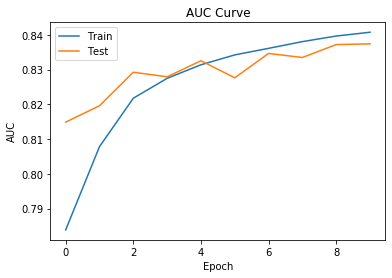

In [38]:
import matplotlib.pyplot as plt

train_loss = model.history.history['AUC']
val_loss = model.history.history['val_AUC']
plt.plot(train_loss, label='Train')
plt.plot(val_loss, label='Test')
plt.legend(title='')
plt.title('AUC Curve')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.show()

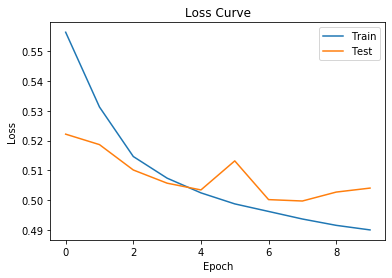

In [39]:
import matplotlib.pyplot as plt

train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
plt.plot(train_loss, label='Train')
plt.plot(val_loss, label='Test')
plt.legend(title='')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [29]:
model.history.history

{'loss': [0.5563940400424457,
  0.531262514572768,
  0.5146266064331645,
  0.5073530776727767,
  0.5024125940671988,
  0.49870970666834286,
  0.4961710332220509,
  0.49362627341208004,
  0.49149636771707306,
  0.4899609051204863],
 'AUC': [0.78385186,
  0.8078157,
  0.82174736,
  0.82746744,
  0.83136535,
  0.8342093,
  0.83609897,
  0.83803195,
  0.83964175,
  0.8407293],
 'val_loss': [0.5221428073346615,
  0.5186260644078254,
  0.5101012495994568,
  0.5056665547072887,
  0.5033992579519748,
  0.5131608513176441,
  0.5001451087474823,
  0.4996768009662628,
  0.5026775236308575,
  0.5040172001361847],
 'val_AUC': [0.8148689,
  0.81958205,
  0.82922405,
  0.8279091,
  0.832528,
  0.8276216,
  0.83462936,
  0.83346367,
  0.8371858,
  0.8373918],
 'lr': [0.01, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]}